<a href="https://colab.research.google.com/github/dhifafaz/dhifafaz/blob/main/Source_Code_FINAL_UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
#Perlu sklearn hanya untuk confussion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

np.set_printoptions(threshold=np.inf)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def plotConfussionMatrix(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.YlGnBu,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

In [3]:
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def derivativeSigmoid(Z):
    sigma= 1/(1+np.exp(-Z))
    derivativeZ = sigma * (1-sigma)
    return derivativeZ

class ANN:
    def __init__(self, x, y):
        self.debug = 0;

        self.inputX=x
        self.outputY=y
        self.networkOutputY=np.zeros((1,self.outputY.shape[1])) 

        self.Layer=2
        self.dimentions = [16, 25, 1] 
        self.parameters = {}
        self.cache = {}

        self.gradient = {}
        
        self.loss = []
        self.learningRate=0.1
        self.sample = self.outputY.shape[1]
        self.threshold=0.5
        
    def neuralAttribute(self):    
        np.random.seed(1)
        self.parameters['W1'] = np.random.randn(self.dimentions[1], self.dimentions[0]) / np.sqrt(self.dimentions[0]) 
        self.parameters['b1'] = np.zeros((self.dimentions[1], 1))        
        self.parameters['W2'] = np.random.randn(self.dimentions[2], self.dimentions[1]) / np.sqrt(self.dimentions[1]) 
        self.parameters['b2'] = np.zeros((self.dimentions[2], 1))                
        return 

    def forwardPropagation(self):    
        Z1 = self.parameters['W1'].dot(self.inputX) + self.parameters['b1'] 
        A1 = Sigmoid(Z1)
        self.cache['Z1'],self.cache['A1']=Z1,A1
        
        Z2 = self.parameters['W2'].dot(A1) + self.parameters['b2']  
        A2 = Sigmoid(Z2)
        self.cache['Z2'],self.cache['A2']=Z2,A2

        self.networkOutputY=A2
        loss=self.calculateLoss(A2)
        return self.networkOutputY, loss

    def calculateLoss(self,networkOutputY):
        loss = (1./self.sample) * (-np.dot(self.outputY,np.log(networkOutputY).T) - np.dot(1-self.outputY, np.log(1-networkOutputY).T))    
        return loss

    def backwardPropagation(self):
        deltaLoss_networkOutputY = - (np.divide(self.outputY, self.networkOutputY ) - np.divide(1 - self.outputY, 1 - self.networkOutputY))    
        
        deltaLoss_Z2 = deltaLoss_networkOutputY * derivativeSigmoid(self.cache['Z2'])    
        deltaLoss_A1 = np.dot(self.parameters["W2"].T,deltaLoss_Z2)
        deltaLoss_W2 = 1./self.cache['A1'].shape[1] * np.dot(deltaLoss_Z2,self.cache['A1'].T)
        deltaLoss_b2 = 1./self.cache['A1'].shape[1] * np.dot(deltaLoss_Z2, np.ones([deltaLoss_Z2.shape[1],1])) 
                            
        deltaLoss_Z1 = deltaLoss_A1 * derivativeSigmoid(self.cache['Z1'])        
        deltaLoss_A0 = np.dot(self.parameters["W1"].T,deltaLoss_Z1)
        deltaLoss_W1 = 1./self.inputX.shape[1] * np.dot(deltaLoss_Z1,self.inputX.T)
        deltaLoss_b1 = 1./self.inputX.shape[1] * np.dot(deltaLoss_Z1, np.ones([deltaLoss_Z1.shape[1],1]))  
        
        self.parameters["W1"] = self.parameters["W1"] - self.learningRate * deltaLoss_W1
        self.parameters["b1"] = self.parameters["b1"] - self.learningRate * deltaLoss_b1
        self.parameters["W2"] = self.parameters["W2"] - self.learningRate * deltaLoss_W2
        self.parameters["b2"] = self.parameters["b2"] - self.learningRate * deltaLoss_b2
        
        return


    def predict(self,x, y):  
        self.inputX=x
        self.outputY=y
        comp = np.zeros((1,x.shape[1]))
        predict, loss= self.forwardPropagation()    
    
        for i in range(0, predict.shape[1]):
            if predict[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0
    
        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))
        
        return comp
    
    def train(self,inputX, outputY, iter = 3000):
        np.random.seed(1)                         
    
        self.neuralAttribute()
    
        for i in range(0, iter):
            networkOutputY, loss=self.forwardPropagation()
            self.backwardPropagation()
        
            if i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, loss))
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.learningRate))
        plt.show()
    
        return 

In [4]:
df = pd.read_csv('diabetes_data_upload.csv')


df['Gender'] =df['Gender'].map({'Male' : 1 , 'Female':0})
df['Polyuria'] =df['Polyuria'].map({'Yes' : 1 , 'No':0})
df['Polydipsia'] =df['Polydipsia'].map({'Yes' : 1 , 'No':0})
df['sudden weight loss'] =df['sudden weight loss'].map({'Yes' : 1 , 'No':0})
df['weakness'] =df['weakness'].map({'Yes' : 1 , 'No':0})
df['Polyphagia'] =df['Polyphagia'].map({'Yes' : 1 , 'No':0})
df['Genital thrush'] =df['Genital thrush'].map({'Yes' : 1 , 'No':0})
df['visual blurring'] =df['visual blurring'].map({'Yes' : 1 , 'No':0})
df['Itching'] =df['Itching'].map({'Yes' : 1 , 'No':0})
df['Irritability'] =df['Irritability'].map({'Yes' : 1 , 'No':0})
df['delayed healing'] =df['delayed healing'].map({'Yes' : 1 , 'No':0})
df['partial paresis'] =df['partial paresis'].map({'Yes' : 1 , 'No':0})
df['muscle stiffness'] =df['muscle stiffness'].map({'Yes' : 1 , 'No':0})
df['Alopecia'] =df['Alopecia'].map({'Yes' : 1 , 'No':0})
df['Obesity'] =df['Obesity'].map({'Yes' : 1 , 'No':0})
df['class'] =df['class'].map({'Positive' : 1 , 'Negative':0})
df['Age'] = (df['Age']-df['Age'].mean())/df['Age'].std()

df = df.astype(float)
scaled_df=df
df.head(100)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.660731,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.820572,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,-0.578436,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,-0.249258,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.985161,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.655983,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,-1.483677,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
97,-1.401382,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
98,-1.072204,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
df.tail(180)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
340,-0.743025,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
341,-0.413847,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
342,-1.072204,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
343,-0.084668,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
344,1.067456,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.743025,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
516,-0.002374,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
517,0.820572,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
518,-1.319087,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
names = ['Age' , 'Gender' , 'Polyuria',  'Polydipsia' , 'sudden weight loss' , 'weakness','Polyphagia' , 'Genital thrush', 'visual blurring' ,'Itching','Irritability','delayed healing', 'partial paresis', 'muscle stiffness' , 'Alopecia','Obesity']
scaled_df = pd.DataFrame(scaled_df, columns=names)

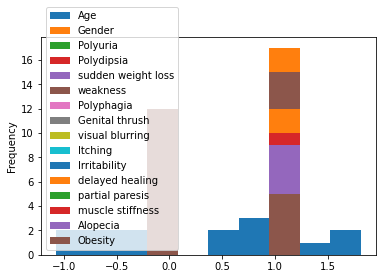

In [8]:
scaled_df.iloc[0:17, 0:17].plot.hist(alpha=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    float64
 2   Polyuria            520 non-null    float64
 3   Polydipsia          520 non-null    float64
 4   sudden weight loss  520 non-null    float64
 5   weakness            520 non-null    float64
 6   Polyphagia          520 non-null    float64
 7   Genital thrush      520 non-null    float64
 8   visual blurring     520 non-null    float64
 9   Itching             520 non-null    float64
 10  Irritability        520 non-null    float64
 11  delayed healing     520 non-null    float64
 12  partial paresis     520 non-null    float64
 13  muscle stiffness    520 non-null    float64
 14  Alopecia            520 non-null    float64
 15  Obesity             520 non-null    float64
 16  class   

In [42]:
x=scaled_df.iloc[0:340,0:16].values.transpose()
y=df.iloc[0:340,16:].values.transpose()

xval=scaled_df.iloc[341:520,0:16].values.transpose()
yval=df.iloc[341:520,16:].values.transpose()

print(df.shape, x.shape, y.shape, xval.shape, yval.shape)
# print(df.iloc[341:520,16:])
neural_network = ANN(x,y)
neural_network.learningRate=0.1
neural_network.dimentions = [16, 25, 1] 

(520, 17) (16, 340) (1, 340) (16, 179) (1, 179)


Cost after iteration 0: 0.742204
Cost after iteration 100: 0.508615
Cost after iteration 200: 0.405512
Cost after iteration 300: 0.329312
Cost after iteration 400: 0.281200
Cost after iteration 500: 0.251775
Cost after iteration 600: 0.233031
Cost after iteration 700: 0.220388
Cost after iteration 800: 0.211408
Cost after iteration 900: 0.204751
Cost after iteration 1000: 0.199644
Cost after iteration 1100: 0.195615
Cost after iteration 1200: 0.192361
Cost after iteration 1300: 0.189680
Cost after iteration 1400: 0.187429
Cost after iteration 1500: 0.185507
Cost after iteration 1600: 0.183838
Cost after iteration 1700: 0.182364
Cost after iteration 1800: 0.181040
Cost after iteration 1900: 0.179830
Cost after iteration 2000: 0.178705
Cost after iteration 2100: 0.177642
Cost after iteration 2200: 0.176621
Cost after iteration 2300: 0.175626
Cost after iteration 2400: 0.174645
Cost after iteration 2500: 0.173667
Cost after iteration 2600: 0.172682
Cost after iteration 2700: 0.171685
Cost

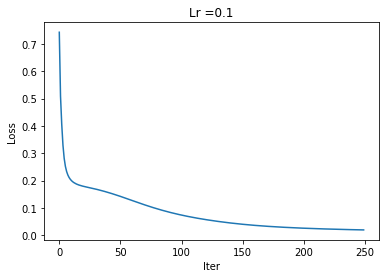

In [43]:
neural_network.train(x, y, iter = 25000)

In [44]:
pred_train = neural_network.predict(x, y)
print("Prediciton accuracy detail : {}".format(pred_train))
pred_test = neural_network.predict(xval, yval)
print("Test accuracy detail : {}".format(pred_test))

Acc: 0.9970588235294118
Prediciton accuracy detail : [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 

Acc: 0.9970588235294118


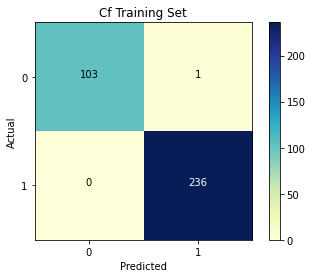

Acc: 0.9944134078212291


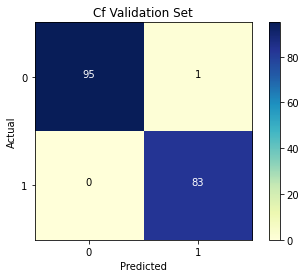

In [48]:
neural_network.threshold=0.5

neural_network.inputX,neural_network.outputY=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(neural_network.predict(x,y)), decimals=0).astype(np.int)
plotConfussionMatrix(target,predicted,'Cf Training Set')

neural_network.inputX,neural_network.outputY=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(neural_network.predict(xval,yval)), decimals=0).astype(np.int)
plotConfussionMatrix(target,predicted,'Cf Validation Set')

Acc: 0.9911764705882353


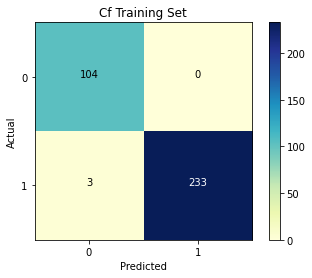

Acc: 0.9832402234636872


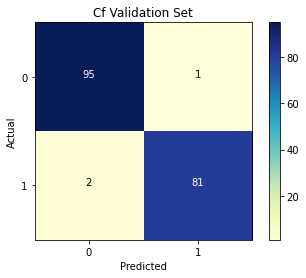

In [49]:
neural_network.threshold=0.7

neural_network.inputX,neural_network.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(neural_network.predict(x,y)), decimals=0).astype(np.int)
plotConfussionMatrix(target,predicted,'Cf Training Set')

neural_network.inputX,neural_network.outputY=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(neural_network.predict(xval,yval)), decimals=0).astype(np.int)
plotConfussionMatrix(target,predicted,'Cf Validation Set')

Acc: 0.9794117647058823


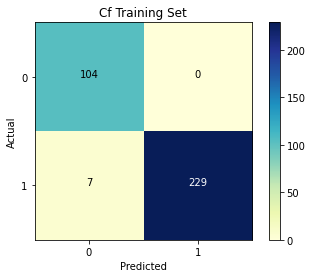

Acc: 0.9720670391061453


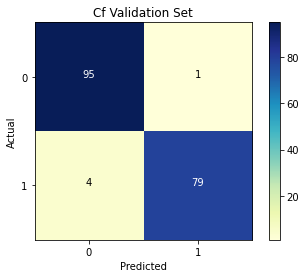

In [50]:
neural_network.threshold=0.9

neural_network.inputX,neural_network.outputY=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(neural_network.predict(x,y)), decimals=0).astype(np.int)
plotConfussionMatrix(target,predicted,'Cf Training Set')

neural_network.inputX,neural_network.outputY=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(neural_network.predict(xval,yval)), decimals=0).astype(np.int)
plotConfussionMatrix(target,predicted,'Cf Validation Set')

In [30]:
neural_network.inputX,neural_network.outputY=xval, yval
yvalh, loss = neural_network.forwardPropagation()
print("\ny (Nilai target seharusnya) = \n",np.around(yval[:,0:179,], decimals=0).astype(np.int))       
print("\nyh (Nilai prediksi yang didapat) = \n",np.around(yvalh[:,0:179,], decimals=0).astype(np.int),"\n")  


y (Nilai target seharusnya) = 
 [[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
  0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]]

yh (Nilai prediksi yang didapat) = 
 [[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
  0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0]] 



In [34]:
# xvall = np.array([[0.67, 0,0,0,0,1,0,1,0,1,0,0,0,1,1,1]]).T ga usah diubah !!
xvall = np.array([[0.8, 1,0,0,0,0,1,0,0,0,0,1,0,0,0,0]]).T
yvall = np.array([1]).T
# pred_test = neural_network.predict(xvall, yvall)
# print("Test accuracy detail : {}".format(pred_test))
neural_network.inputX,neural_network.outputY=xvall, yvall 
yvalh, loss = neural_network.forwardPropagation()
print("\ny (Nilai target seharusnya) = ",np.around(yvall, decimals=0).astype(np.int))       
print("\nyh (Nilai prediksi yang didapat) = ",np.around(yvalh, decimals=0).astype(np.int),"\n")  


y (Nilai target seharusnya) =  [1]

yh (Nilai prediksi yang didapat) =  [[0]] 



In [ ]:
# Dhifaf Athiyah Zhabiyan
# 119140047
# Eliza Maharani Sutowo
# 119140002
# Abdurrachman Farras
# 119140052
